#### Hiệu chỉnh xu thế bằng hàm xu thế

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Tải dữ liệu tỉ giá
exrate = pd.read_csv('../Data/eurusd.csv', parse_dates=['Date'],
                 infer_datetime_format=True)
exrate = exrate[['Date','Close']].set_index('Date')

(<matplotlib.legend.Legend at 0x275218f9b20>,
 <matplotlib.legend.Legend at 0x275218f9cd0>)

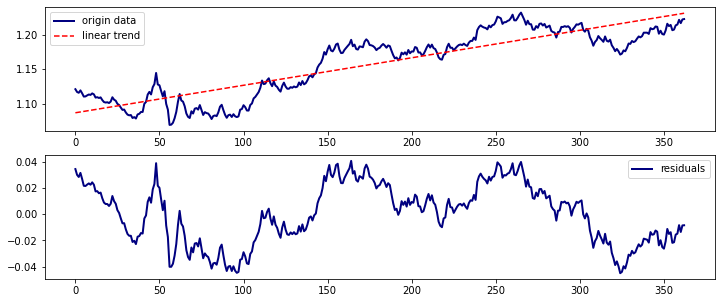

In [3]:
# Dữ liệu tỉ giá Eur/Usd giai đoạn 2020-2021
data = exrate.loc['2020':'2022',['Close']]

# Ước lượng xu thế tuyến tính
from sklearn.linear_model import LinearRegression
x = np.arange(len(data)).reshape(-1,1)
y = data.Close
reg = LinearRegression().fit(x,y)
resid = y-reg.predict(x)  # phần dư

# Vẽ đồ thị
fig, ax = plt.subplots(2,1,figsize=(12,5))
ax[0].plot(data.values, color='navy', linewidth=2, label="origin data")
ax[0].plot(reg.predict(x), '--', color='red', label='linear trend')
ax[1].plot(resid.values, color='navy', linewidth=2, label='residuals')
ax[0].legend(), ax[1].legend()